In [33]:
from cellori import Cellori
import pandas as pd
import glob


# all import statements
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import tifffile
import pandas as pd
import seaborn as sns
import time
import os
import glob
from skimage import measure
import skimage.measure as skmeas
from PyQt5 import QtCore, QtGui, QtWidgets
from statannot import add_stat_annotation


Image.MAX_IMAGE_PIXELS = None

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [28]:
#Path to files from Step1
main_path = "/Volumes/rag_big_2/Raul/20240601_NewData/20240604_DKK1/Cellori_clean"
paths_to_all_pik = glob.glob(main_path+"/*.pkl")

#Name of sample names
want = ['DKK1_500','DKK1_200','DKK1_con']

colony_all_files = []
colony_hold = []
colony_name = []

for i in paths_to_all_pik:
    #print("         " + i )
    
    name_compare = i.split("/")[-1].split('.')[0].split('Plate2024_06_04_RAR_')[-1][0:8]
    print(name_compare)
    if len(set(want)&set([name_compare])) == 1:

        df_points = pd.read_pickle(i)


        #Get all colony sizes
        for k,m in enumerate(np.unique(df_points['colonyID'])):
            if m != -1:
                colony_hold.append(len(df_points.loc[df_points['colonyID'] == m]))
                colony_name.append(name_compare)
                           
    colony_all_files.append(colony_hold)

DKK1_200
DKK1_200
DKK1_200
DKK1_200
DKK1_200
DKK1_500
DKK1_500
DKK1_con
DKK1_con
DKK1_con
DKK1_con
DKK1_con
DKK1_con
DKK1_con


In [29]:
d = {'values':colony_hold,'names':colony_name}
# Create the pandas DataFrame
df = pd.DataFrame(data=d)
 
# print dataframe.
print(df, "\n")

     values     names
0       206  DKK1_200
1       322  DKK1_200
2       215  DKK1_200
3       108  DKK1_200
4       218  DKK1_200
..      ...       ...
431       2  DKK1_con
432     134  DKK1_con
433      17  DKK1_con
434     246  DKK1_con
435       2  DKK1_con

[436 rows x 2 columns] 



DKK1_con v.s. DKK1_200: t-test independent samples with Bonferroni correction, P_val=9.334e-01 stat=7.288e-01
DKK1_con v.s. DKK1_500: t-test independent samples with Bonferroni correction, P_val=2.185e-01 stat=1.607e+00


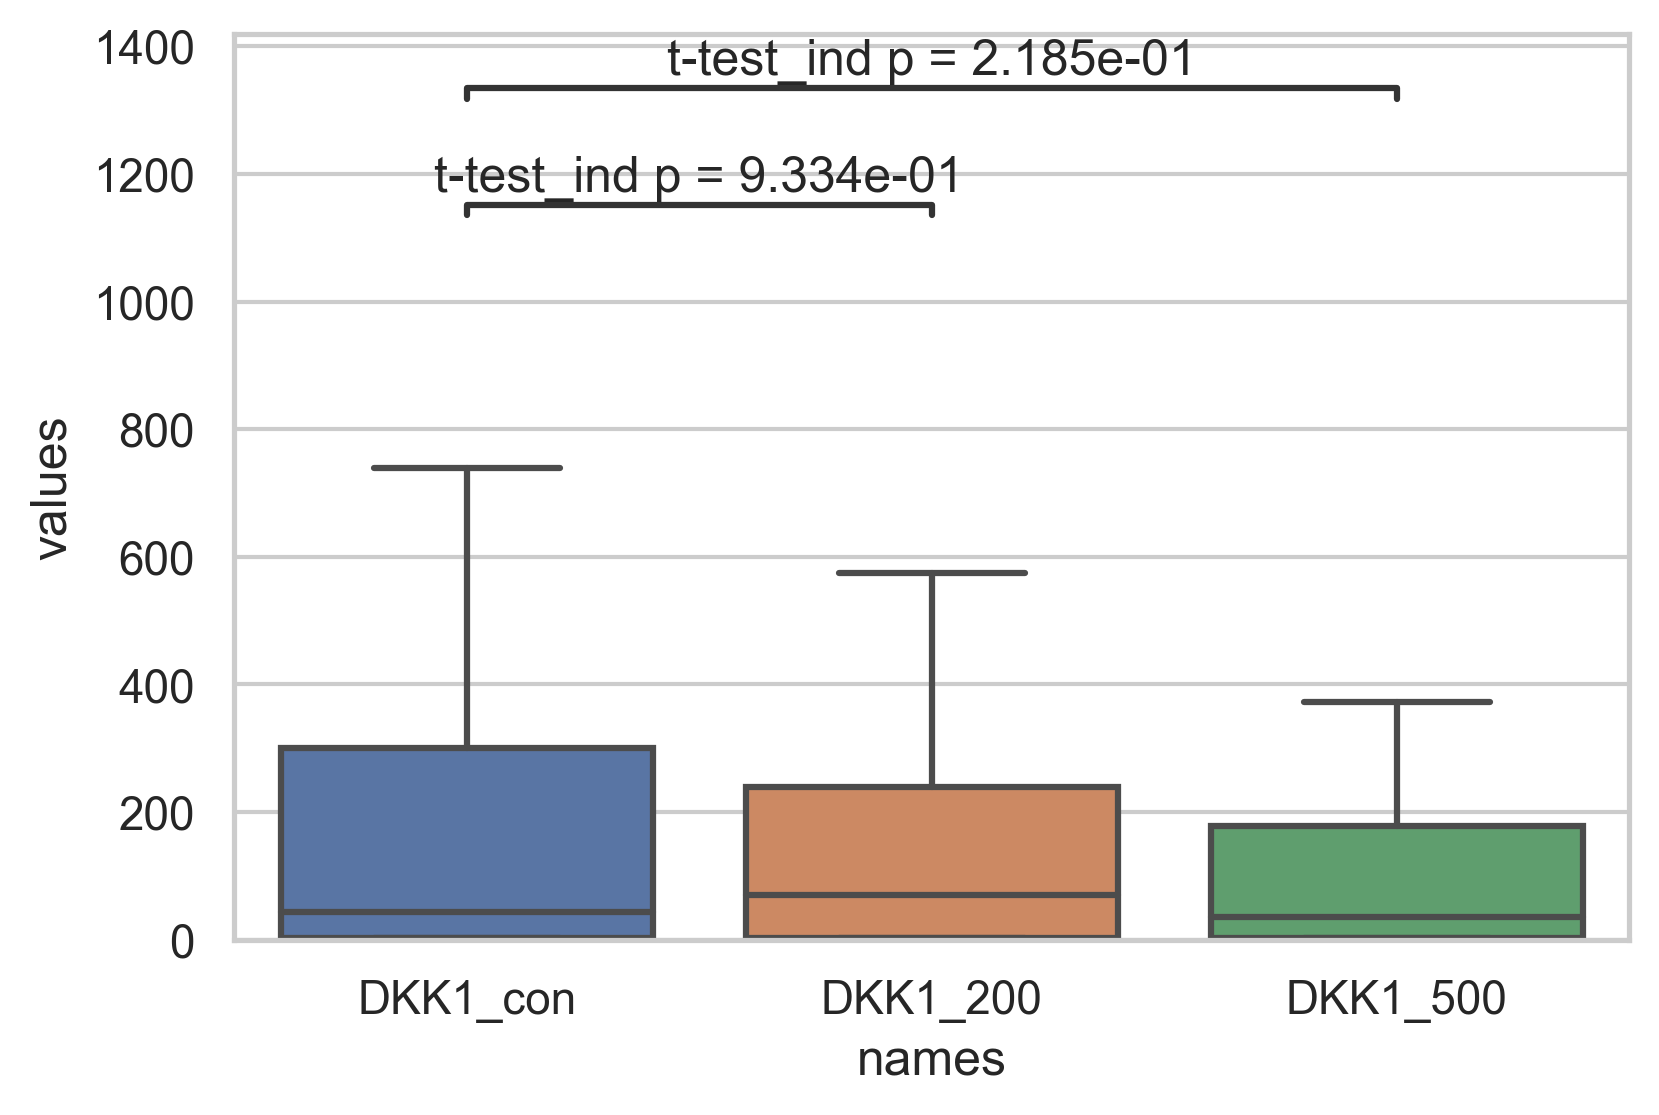

In [46]:
# remove colonies of a single clone
df = df[df.iloc[:,0] > 1]

# Define the order of the categories
order = ['DKK1_con', 'DKK1_200', 'DKK1_500']

# Create the boxplot with the specified order
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="names", y="values", data=df, order=order, showfliers=False)
plt.ylim(0,800)
# Add statistical annotation
box_pairs = [("DKK1_con", "DKK1_200"), ("DKK1_con", "DKK1_500")]

add_stat_annotation(ax, data=df, x="names", y="values",
                    order=order, box_pairs=box_pairs,
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)

# Save and show the plot
output_path = "/Users/raul/Documents/GitHub/EsophagealCloneVariability/RAR056/plots/rhDKK1_rep2.pdf"
plt.savefig(output_path, bbox_inches='tight')
plt.show()